***
### **Trabalho Algoritmos Não-Supervisionados para clusterização**
***
##### **Aluno**: José Victor Cavalcante Azevedo
##### **Professor**: Luiz Frias
***

 Este trabalho foi realizado utilizando um ambiente virtual Anaconda. As seguintes bibliotecas foram instaladas utilizando **conda**:
 - numpy
 - scipy
 - pandas
 - matplot
 - seaborn
 - sklearn

In [1]:
import numpy as np
import scipy
import scipy.spatial

import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='notebook', style='darkgrid', palette='Spectral')

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

## Importação da base de dados e checagem dos dados

In [2]:
df = pd.read_csv("data/Country-data.csv", sep=',', index_col=0)
df.sample(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Montenegro,6.8,37.0,9.11,62.7,14000,1.600,76.4,1.77,6680
Tanzania,71.9,18.7,6.01,29.1,2090,9.250,59.3,5.43,702
Morocco,33.5,32.2,5.20,43.0,6440,0.976,73.5,2.58,2830
Belize,18.8,58.2,5.20,57.5,7880,1.140,71.4,2.71,4340
Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
Ukraine,11.7,47.1,7.72,51.1,7820,13.400,70.4,1.44,2970
Maldives,13.2,77.6,6.33,65.4,10500,2.880,77.9,2.23,7100
South Africa,53.7,28.6,8.94,27.4,12000,6.350,54.3,2.59,7280
Guinea,109.0,30.3,4.93,43.2,1190,16.100,58.0,5.34,648


In [3]:
pd.options.display.max_colwidth = 300

In [4]:
df_dic = pd.read_csv("data/data-dictionary.csv", sep=',', index_col=0)
df_dic

,Description
Column Name,
country,Name of the country
child_mort,Death of children under 5 years of age per 1000 live births
exports,Exports of goods and services per capita. Given as %age of the GDP per capita
health,Total health spending per capita. Given as %age of GDP per capita
imports,Imports of goods and services per capita. Given as %age of the GDP per capita
Income,Net income per person
Inflation,The measurement of the annual growth rate of the Total GDP
life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.


In [87]:
print("Número total de países: ",df.index.unique().size)

Número total de países:  167


In [88]:
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [89]:
df.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 17.1+ KB


## Data Understanding

A base de dados consiste em dados de características socio-econômicas (PIB per capita, exportações, importações, investimento em saúde, renda per capita e inflação ) e de saúde (mortalidade infantil, expectativa de vida e taxa de fertilidade) que determinam o índice de desenvolvimento de 167 países.

Verificado que não há dados vazios ou nulos. Todos os dados são numéricos (quantitativos), não há dados categóricos (qualitativos).

A seguir observamos a média, desvio-padrão, median, quartis e os valores máximos e mínimos.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


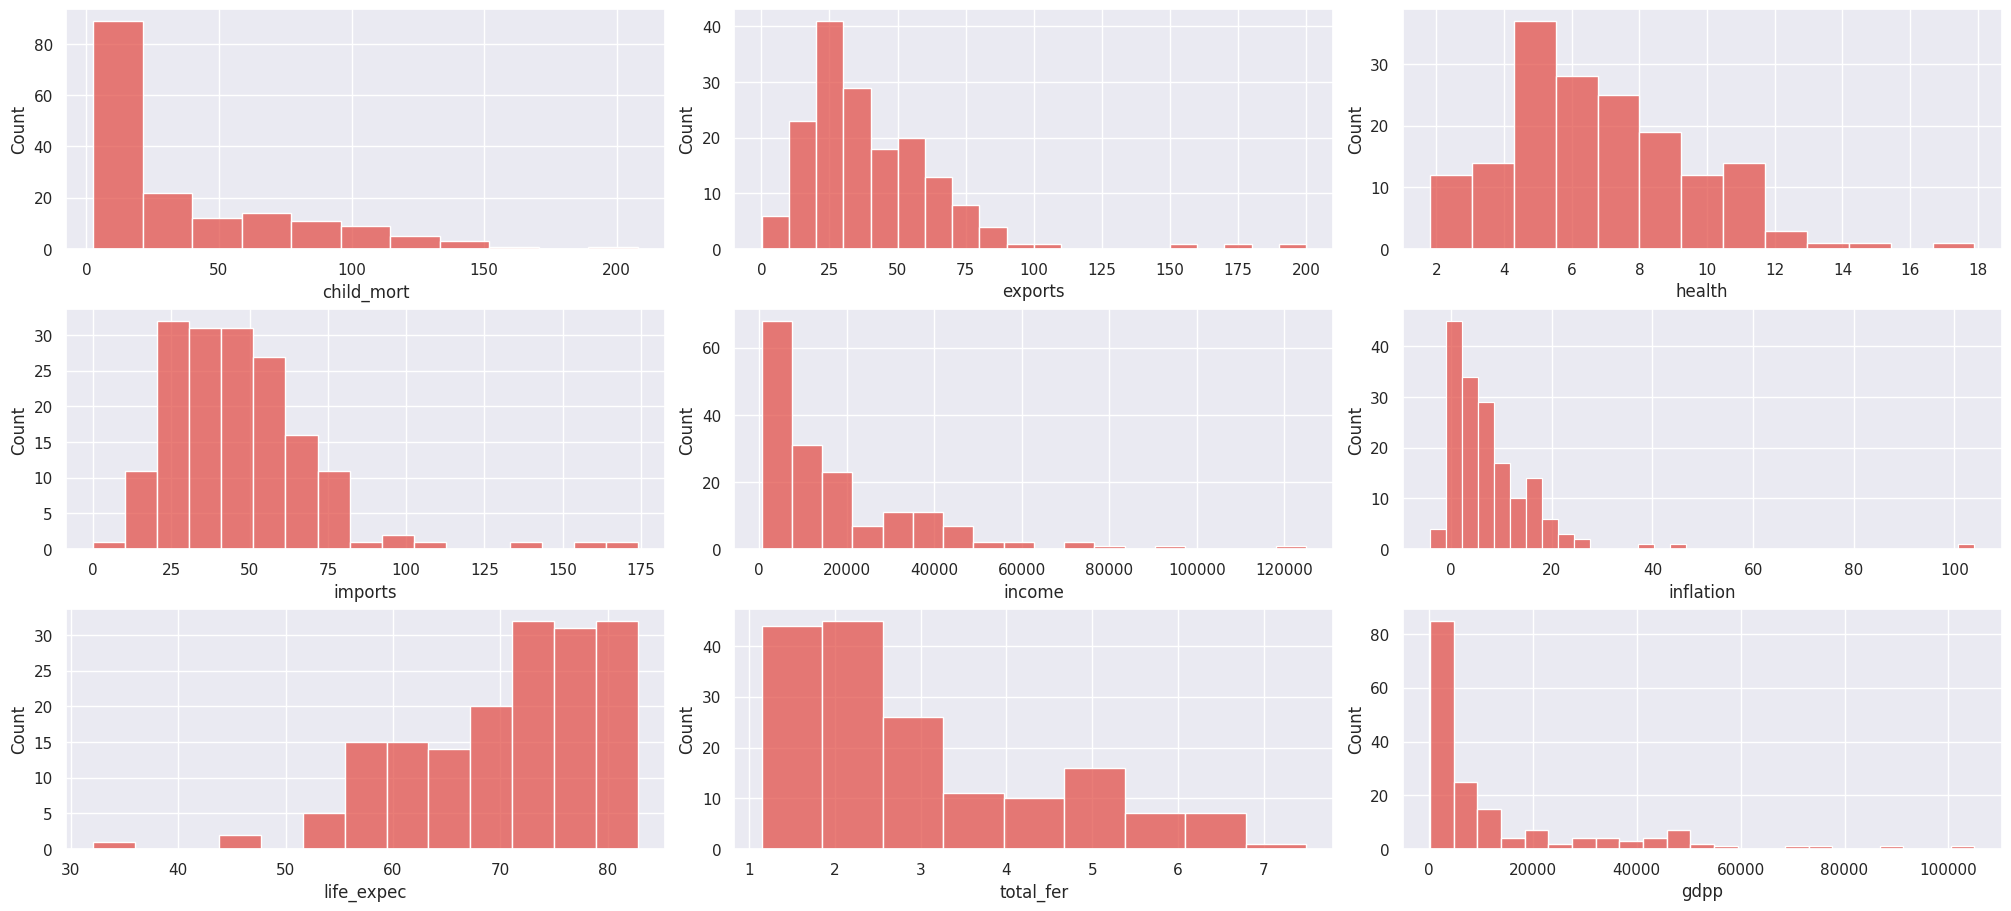

In [7]:
fig, ax = plt.subplots(3,3, figsize=(20,9), constrained_layout=True)
ax=ax.flatten()
int_cols= df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.histplot(x=df[i], ax=ax[x])

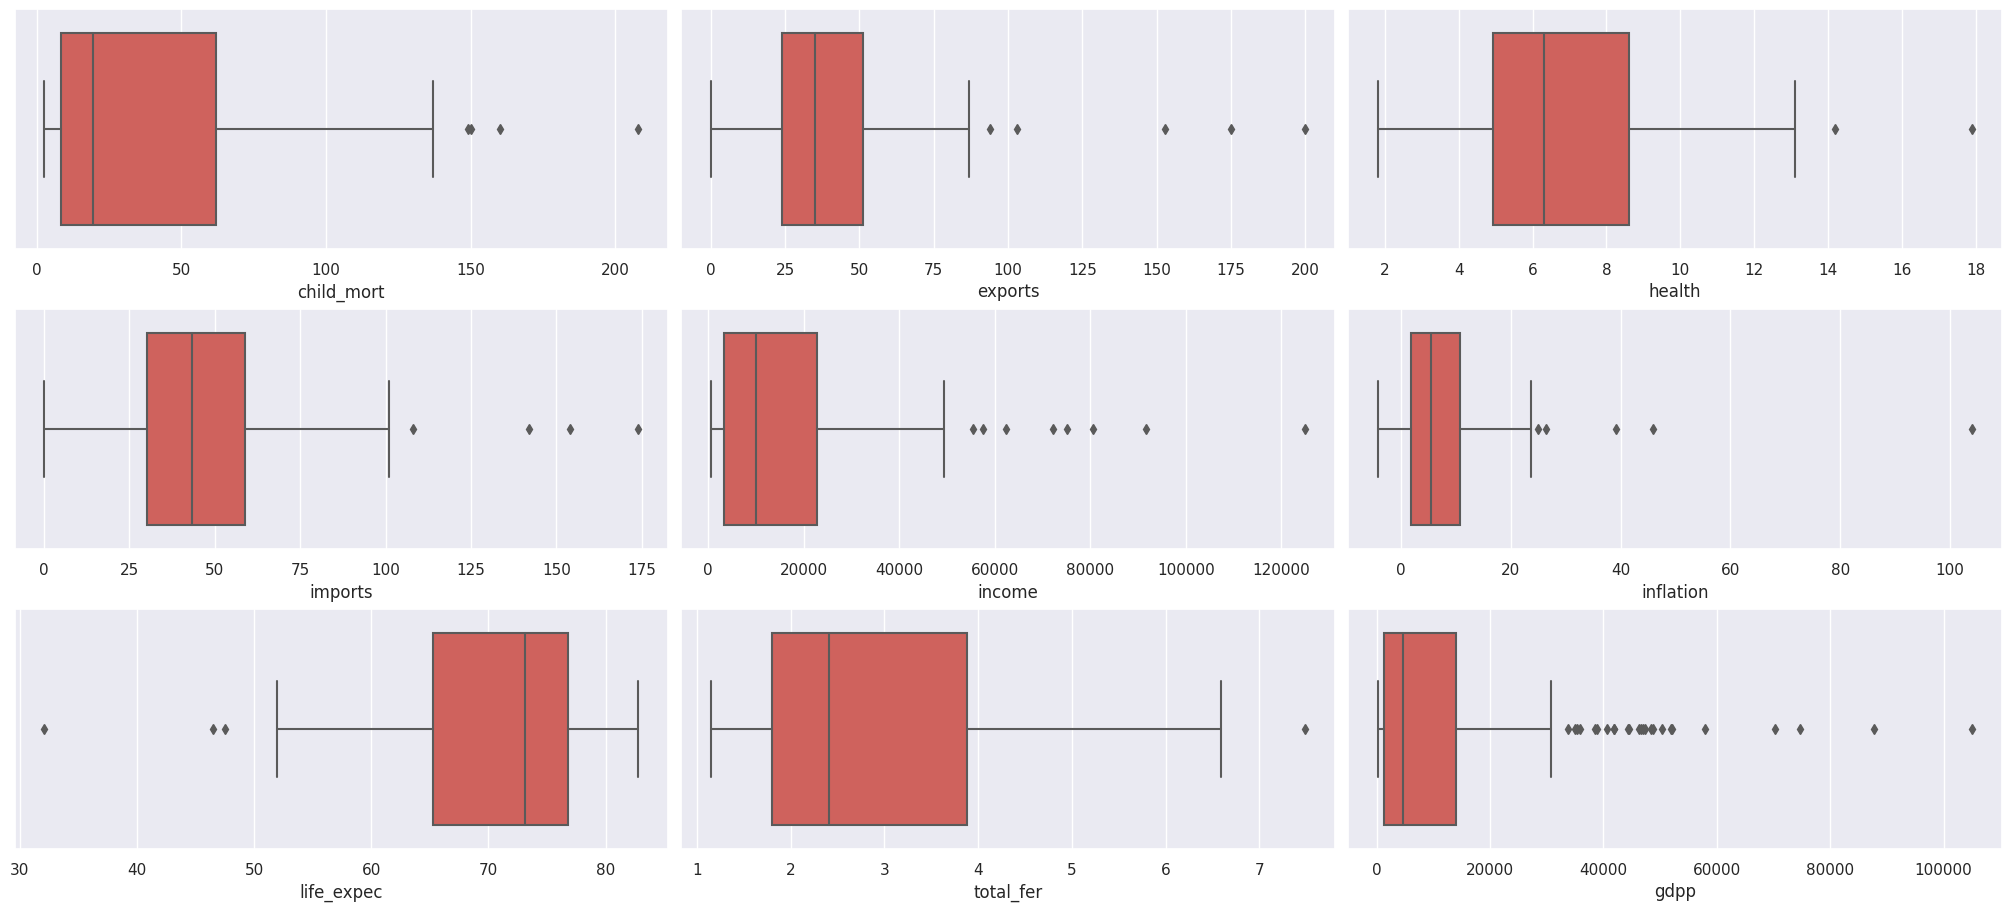

In [8]:
fig, ax = plt.subplots(3,3, figsize=(20,9), constrained_layout=True)
ax=ax.flatten()
int_cols= df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(x=df[i], ax=ax[x])

In [23]:
df.sort_values('income',ascending=False).head(10)['income']

country
Qatar                   125000
Luxembourg               91700
Brunei                   80600
Kuwait                   75200
Singapore                72100
Norway                   62300
United Arab Emirates     57600
Switzerland              55500
United States            49400
Ireland                  45700
Name: income, dtype: int64

In [24]:
df.sort_values('gdpp',ascending=False)[0:10].head(10)['gdpp']

country
Luxembourg       105000
Norway            87800
Switzerland       74600
Qatar             70300
Denmark           58000
Sweden            52100
Australia         51900
Netherlands       50300
Ireland           48700
United States     48400
Name: gdpp, dtype: int64

In [20]:
df.sort_values('inflation',ascending=False).head(10)['inflation']

country
Nigeria              104.0
Venezuela             45.9
Mongolia              39.2
Timor-Leste           26.5
Equatorial Guinea     24.9
Yemen                 23.6
Sri Lanka             22.8
Angola                22.4
Argentina             20.9
Congo, Dem. Rep.      20.8
Name: inflation, dtype: float64

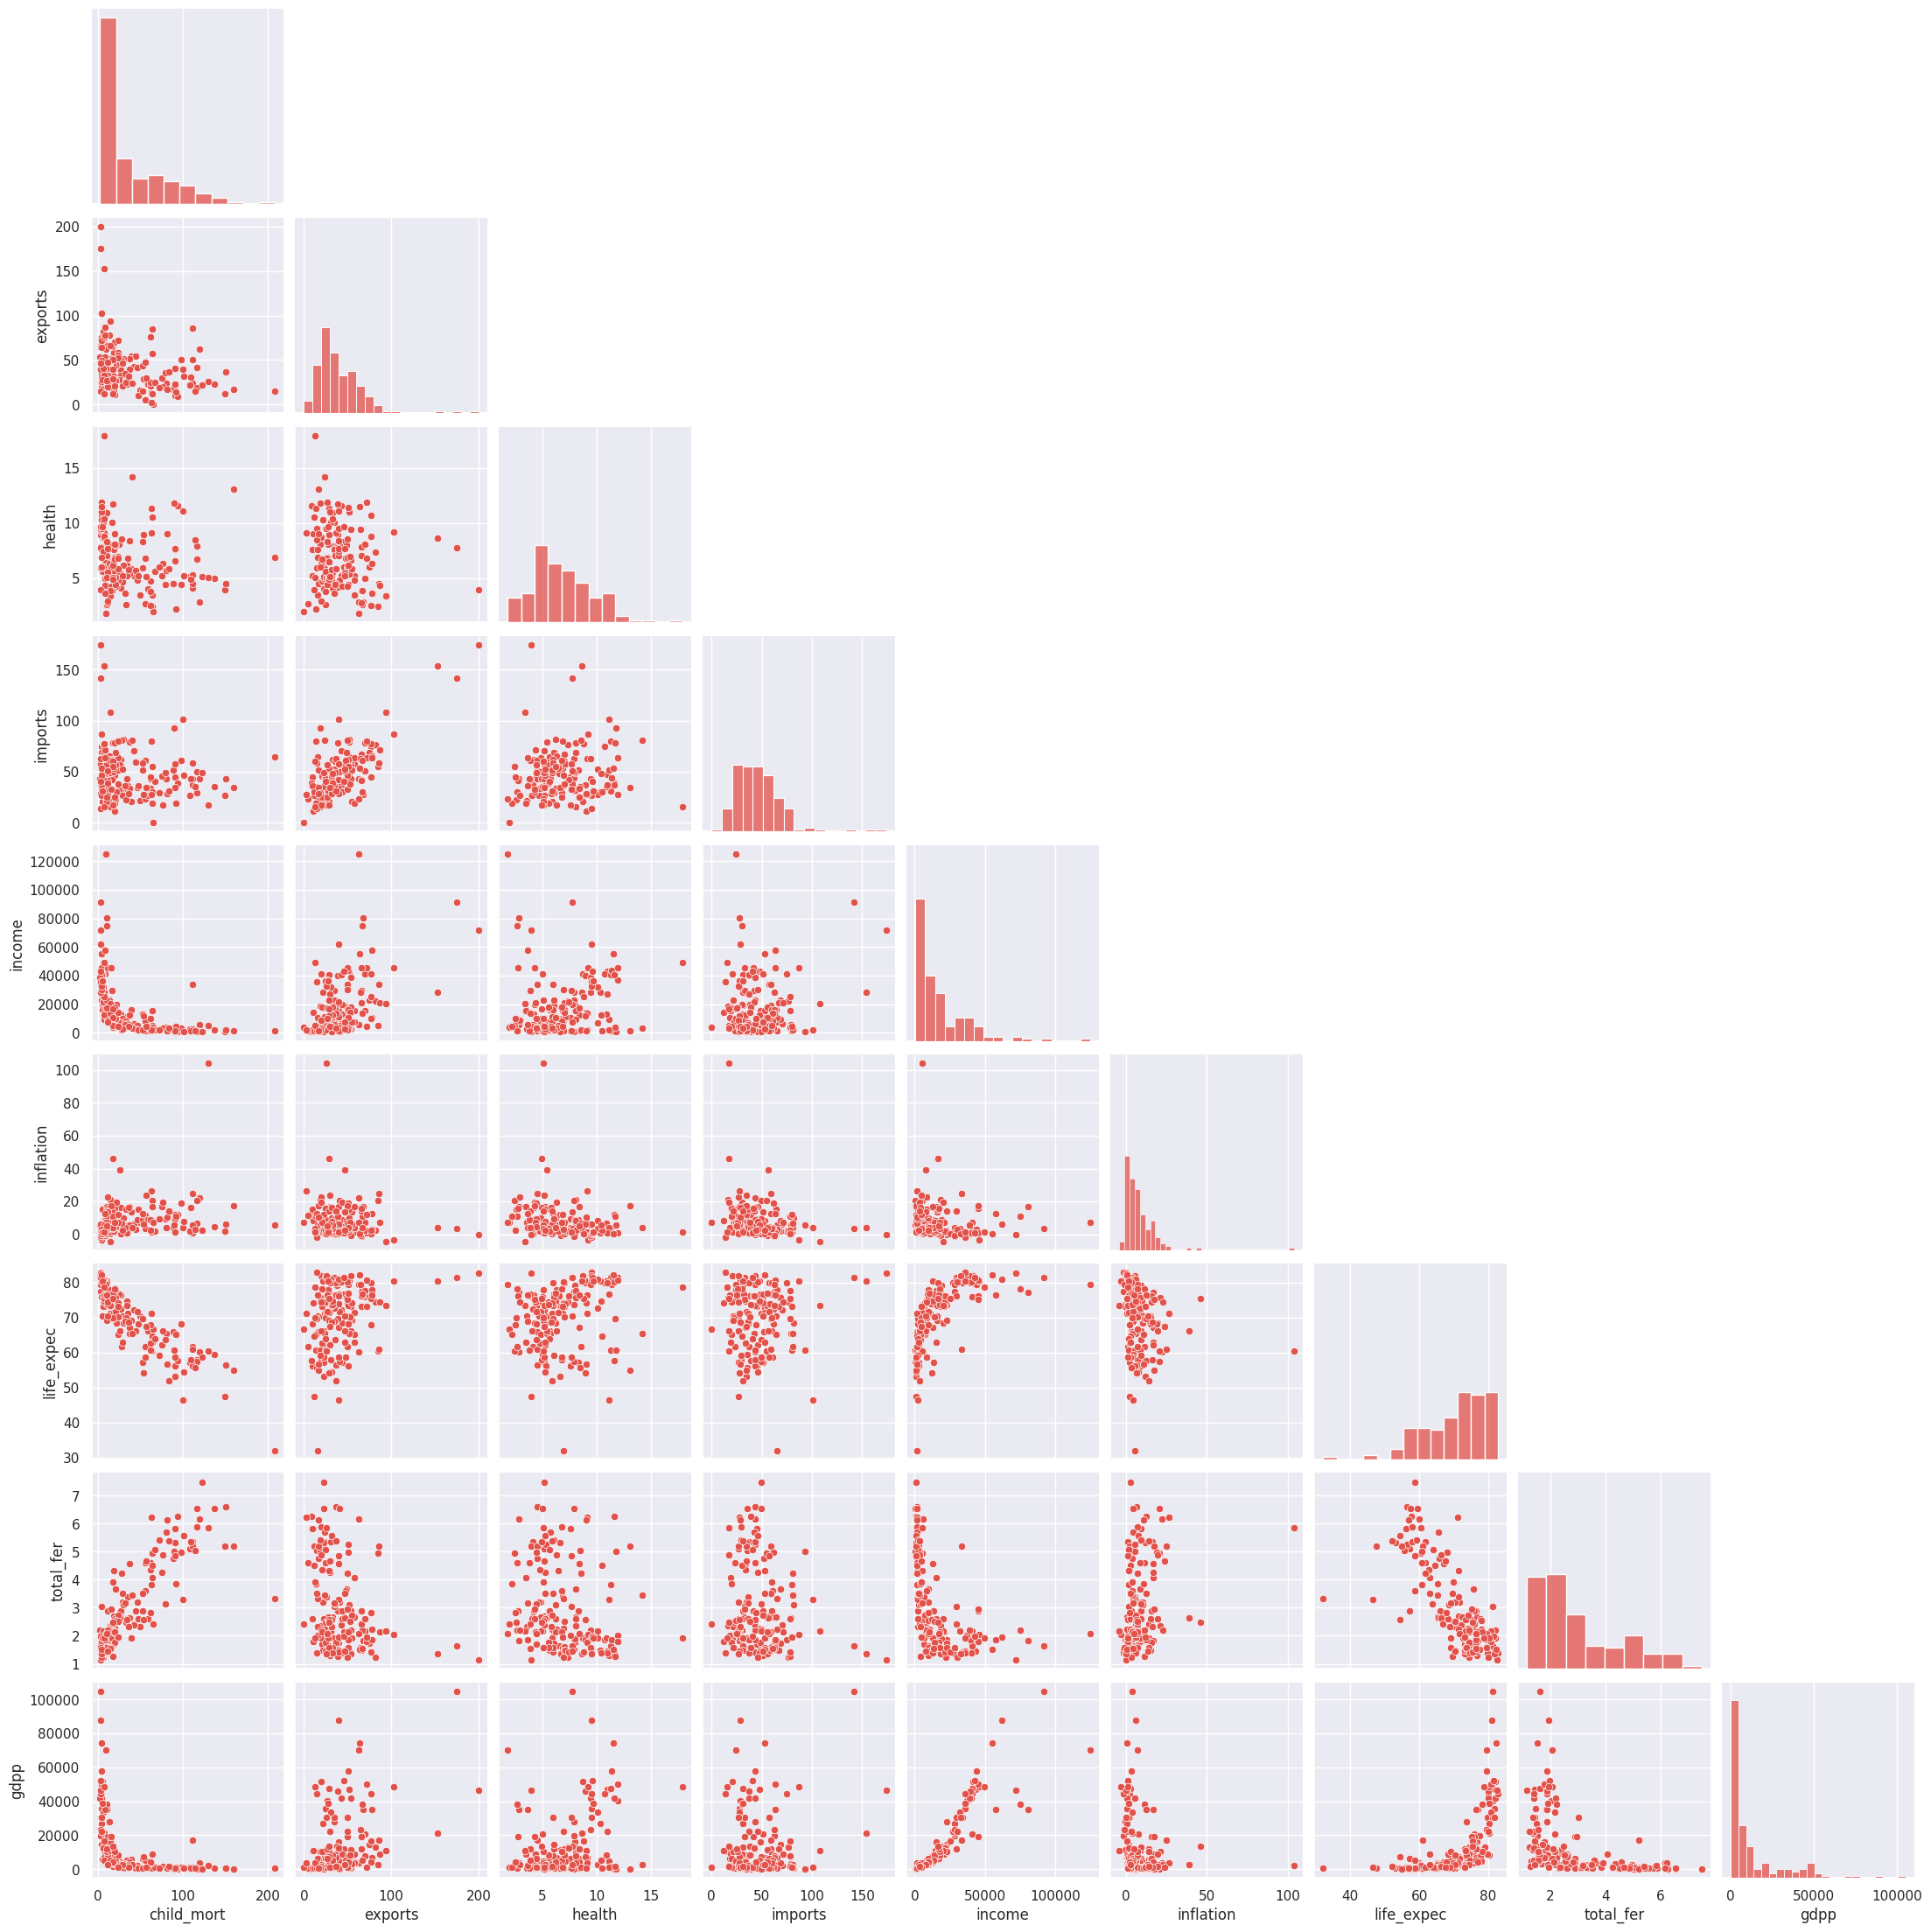

In [117]:
sns.pairplot(df, corner=True)

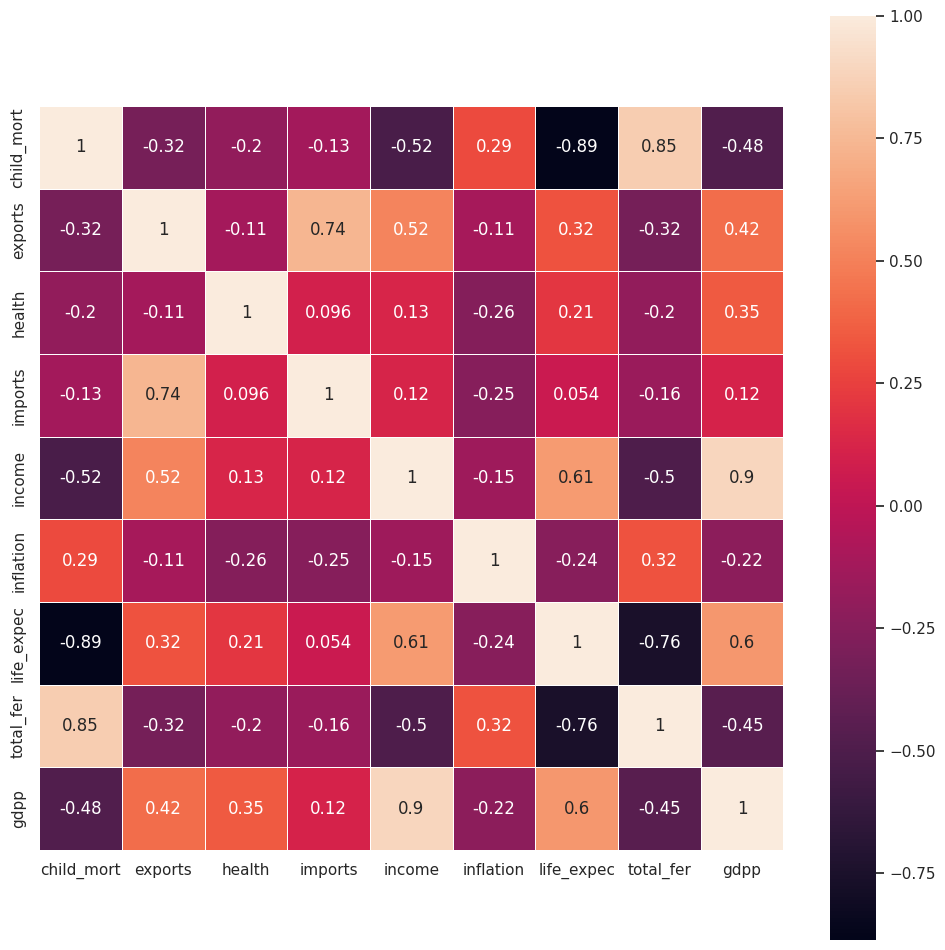

In [94]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, square=True, linewidths=.5, annot=True);

In [29]:
 from sklearn.preprocessing import StandardScaler
 scaler = StandardScaler()
 df_normalized = pd.DataFrame(scaler.fit_transform(df))
 df_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
0,167.0,-3.722904e-17,1.003008,-0.887138,-0.746619,-0.471798,0.592667,4.221297
1,167.0,2.127373e-16,1.003008,-1.500192,-0.633337,-0.223528,0.374720,5.813835
2,167.0,5.504579e-16,1.003008,-1.827827,-0.692211,-0.181001,0.651541,4.047436
3,167.0,2.765585e-16,1.003008,-1.939940,-0.691479,-0.148743,0.491353,5.266181
4,167.0,-7.977650e-17,1.003008,-0.860326,-0.717456,-0.373808,0.294237,5.611542
5,167.0,-1.063687e-17,1.003008,-1.137852,-0.566641,-0.226950,0.281636,9.129718
6,167.0,3.696311e-16,1.003008,-4.337186,-0.592758,0.286958,0.704258,1.380962
7,167.0,3.044803e-16,1.003008,-1.191250,-0.763902,-0.356431,0.617525,3.009349
8,167.0,5.850277e-17,1.003008,-0.696801,-0.636660,-0.454431,0.059421,5.036507


In [25]:
normalized_df = (df-df.mean())/df.std()
normalized_df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,-2.127373e-17,1.0,-0.884478,-0.744380,-0.470383,0.590889,4.208640
exports,167.0,2.340111e-16,1.0,-1.495694,-0.631438,-0.222858,0.373596,5.796402
health,167.0,5.331730e-16,1.0,-1.822346,-0.690135,-0.180458,0.649588,4.035299
imports,167.0,3.297429e-16,1.0,-1.934123,-0.689405,-0.148297,0.489880,5.250390
income,167.0,-7.711729e-17,1.0,-0.857746,-0.715305,-0.372687,0.293355,5.594716
inflation,167.0,-3.191060e-17,1.0,-1.134440,-0.564942,-0.226270,0.280792,9.102343
life_expec,167.0,3.616535e-16,1.0,-4.324181,-0.590980,0.286097,0.702147,1.376822
total_fer,167.0,3.097988e-16,1.0,-1.187678,-0.761612,-0.355362,0.615674,3.000326
gdpp,167.0,5.118992e-17,1.0,-0.694711,-0.634751,-0.453068,0.059243,5.021405


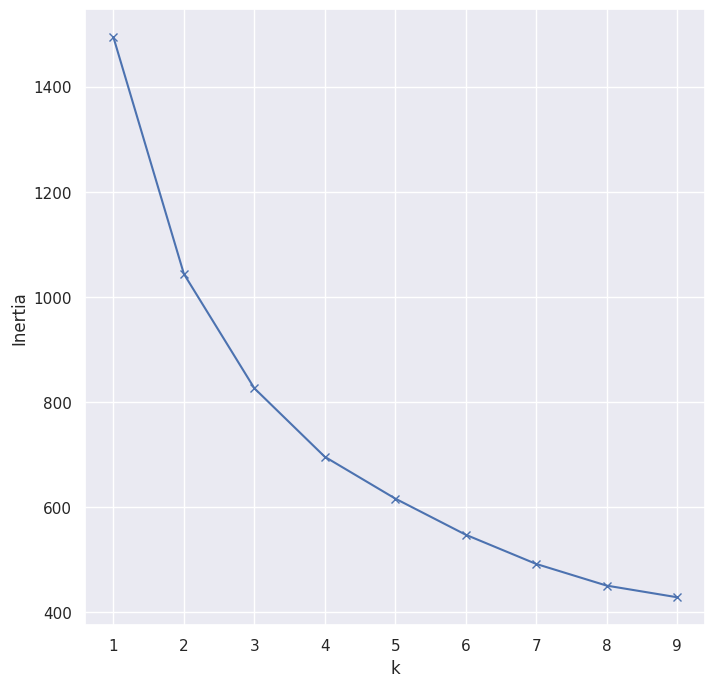

In [119]:
def plot_inertia(df, kmin=1, kmax=10, figsize=(8, 8)):

    _range = range(kmin, kmax)
    inertias = []
    for k in _range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=figsize)
    plt.plot(_range, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.show()
    
plot_inertia(normalized_df)

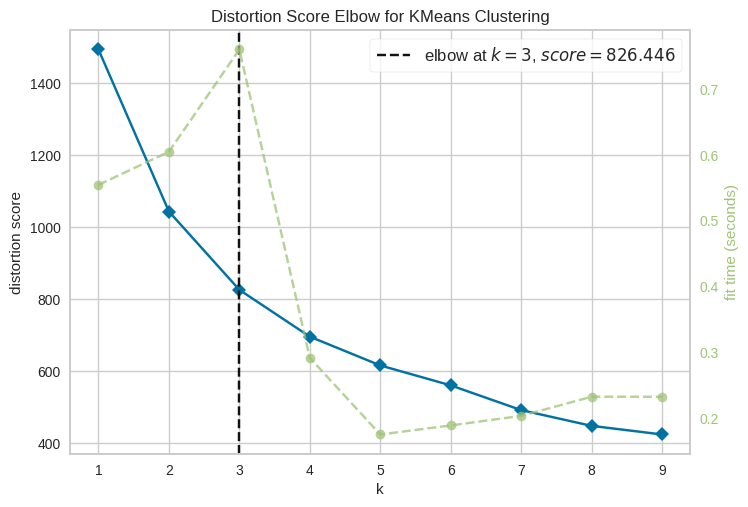

In [121]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(normalized_df); 
visualizer.poof();

In [123]:
model = KMeans(n_clusters=3, random_state=1)
model.fit(normalized_df)

KMeans(n_clusters=3, random_state=1)

In [124]:
df['cluster_Id'] = model.labels_
df.sample(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_Id
country,,,,,,,,,,
Slovak Republic,7.0,76.30,8.79,77.8,25200,0.485,75.5,1.43,16600,2
Germany,4.2,42.30,11.60,37.1,40400,0.758,80.1,1.39,41800,2
Togo,90.3,40.20,7.65,57.3,1210,1.180,58.7,4.87,488,0
Maldives,13.2,77.60,6.33,65.4,10500,2.880,77.9,2.23,7100,1
Serbia,7.6,32.90,10.40,47.9,12700,5.880,74.7,1.40,5410,1
Tajikistan,52.4,14.90,5.98,58.6,2110,12.500,69.6,3.51,738,1
India,58.8,22.60,4.05,27.1,4410,8.980,66.2,2.60,1350,1
Lebanon,10.3,35.80,7.03,60.2,16300,0.238,79.8,1.61,8860,1
Uruguay,10.6,26.30,8.35,25.4,17100,4.910,76.4,2.08,11900,1


In [138]:
cluster_0 = df[df['cluster_Id']==0].index
cluster_1 = df[df['cluster_Id']==1].index
cluster_2 = df[df['cluster_Id']==2].index


In [139]:
print(cluster_0)
print(cluster_1)
print(cluster_2)

Index(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia',
       'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone',
       'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda',
       'Yemen', 'Zambia'],
      dtype='object', name='country')
Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria',
       'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Domi

<AxesSubplot: xlabel='child_mort', ylabel='health'>

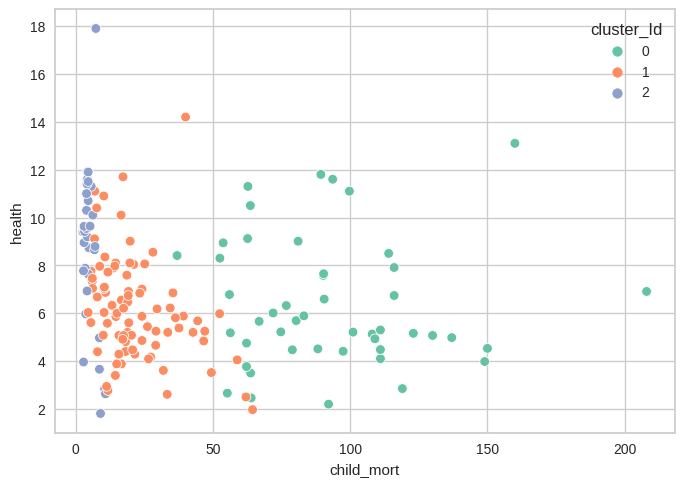

In [128]:
sns.scatterplot( x='child_mort', y='health', hue = 'cluster_Id' ,data = df, palette = 'Set2')

/home/victor/.local/lib/python3.10/site-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


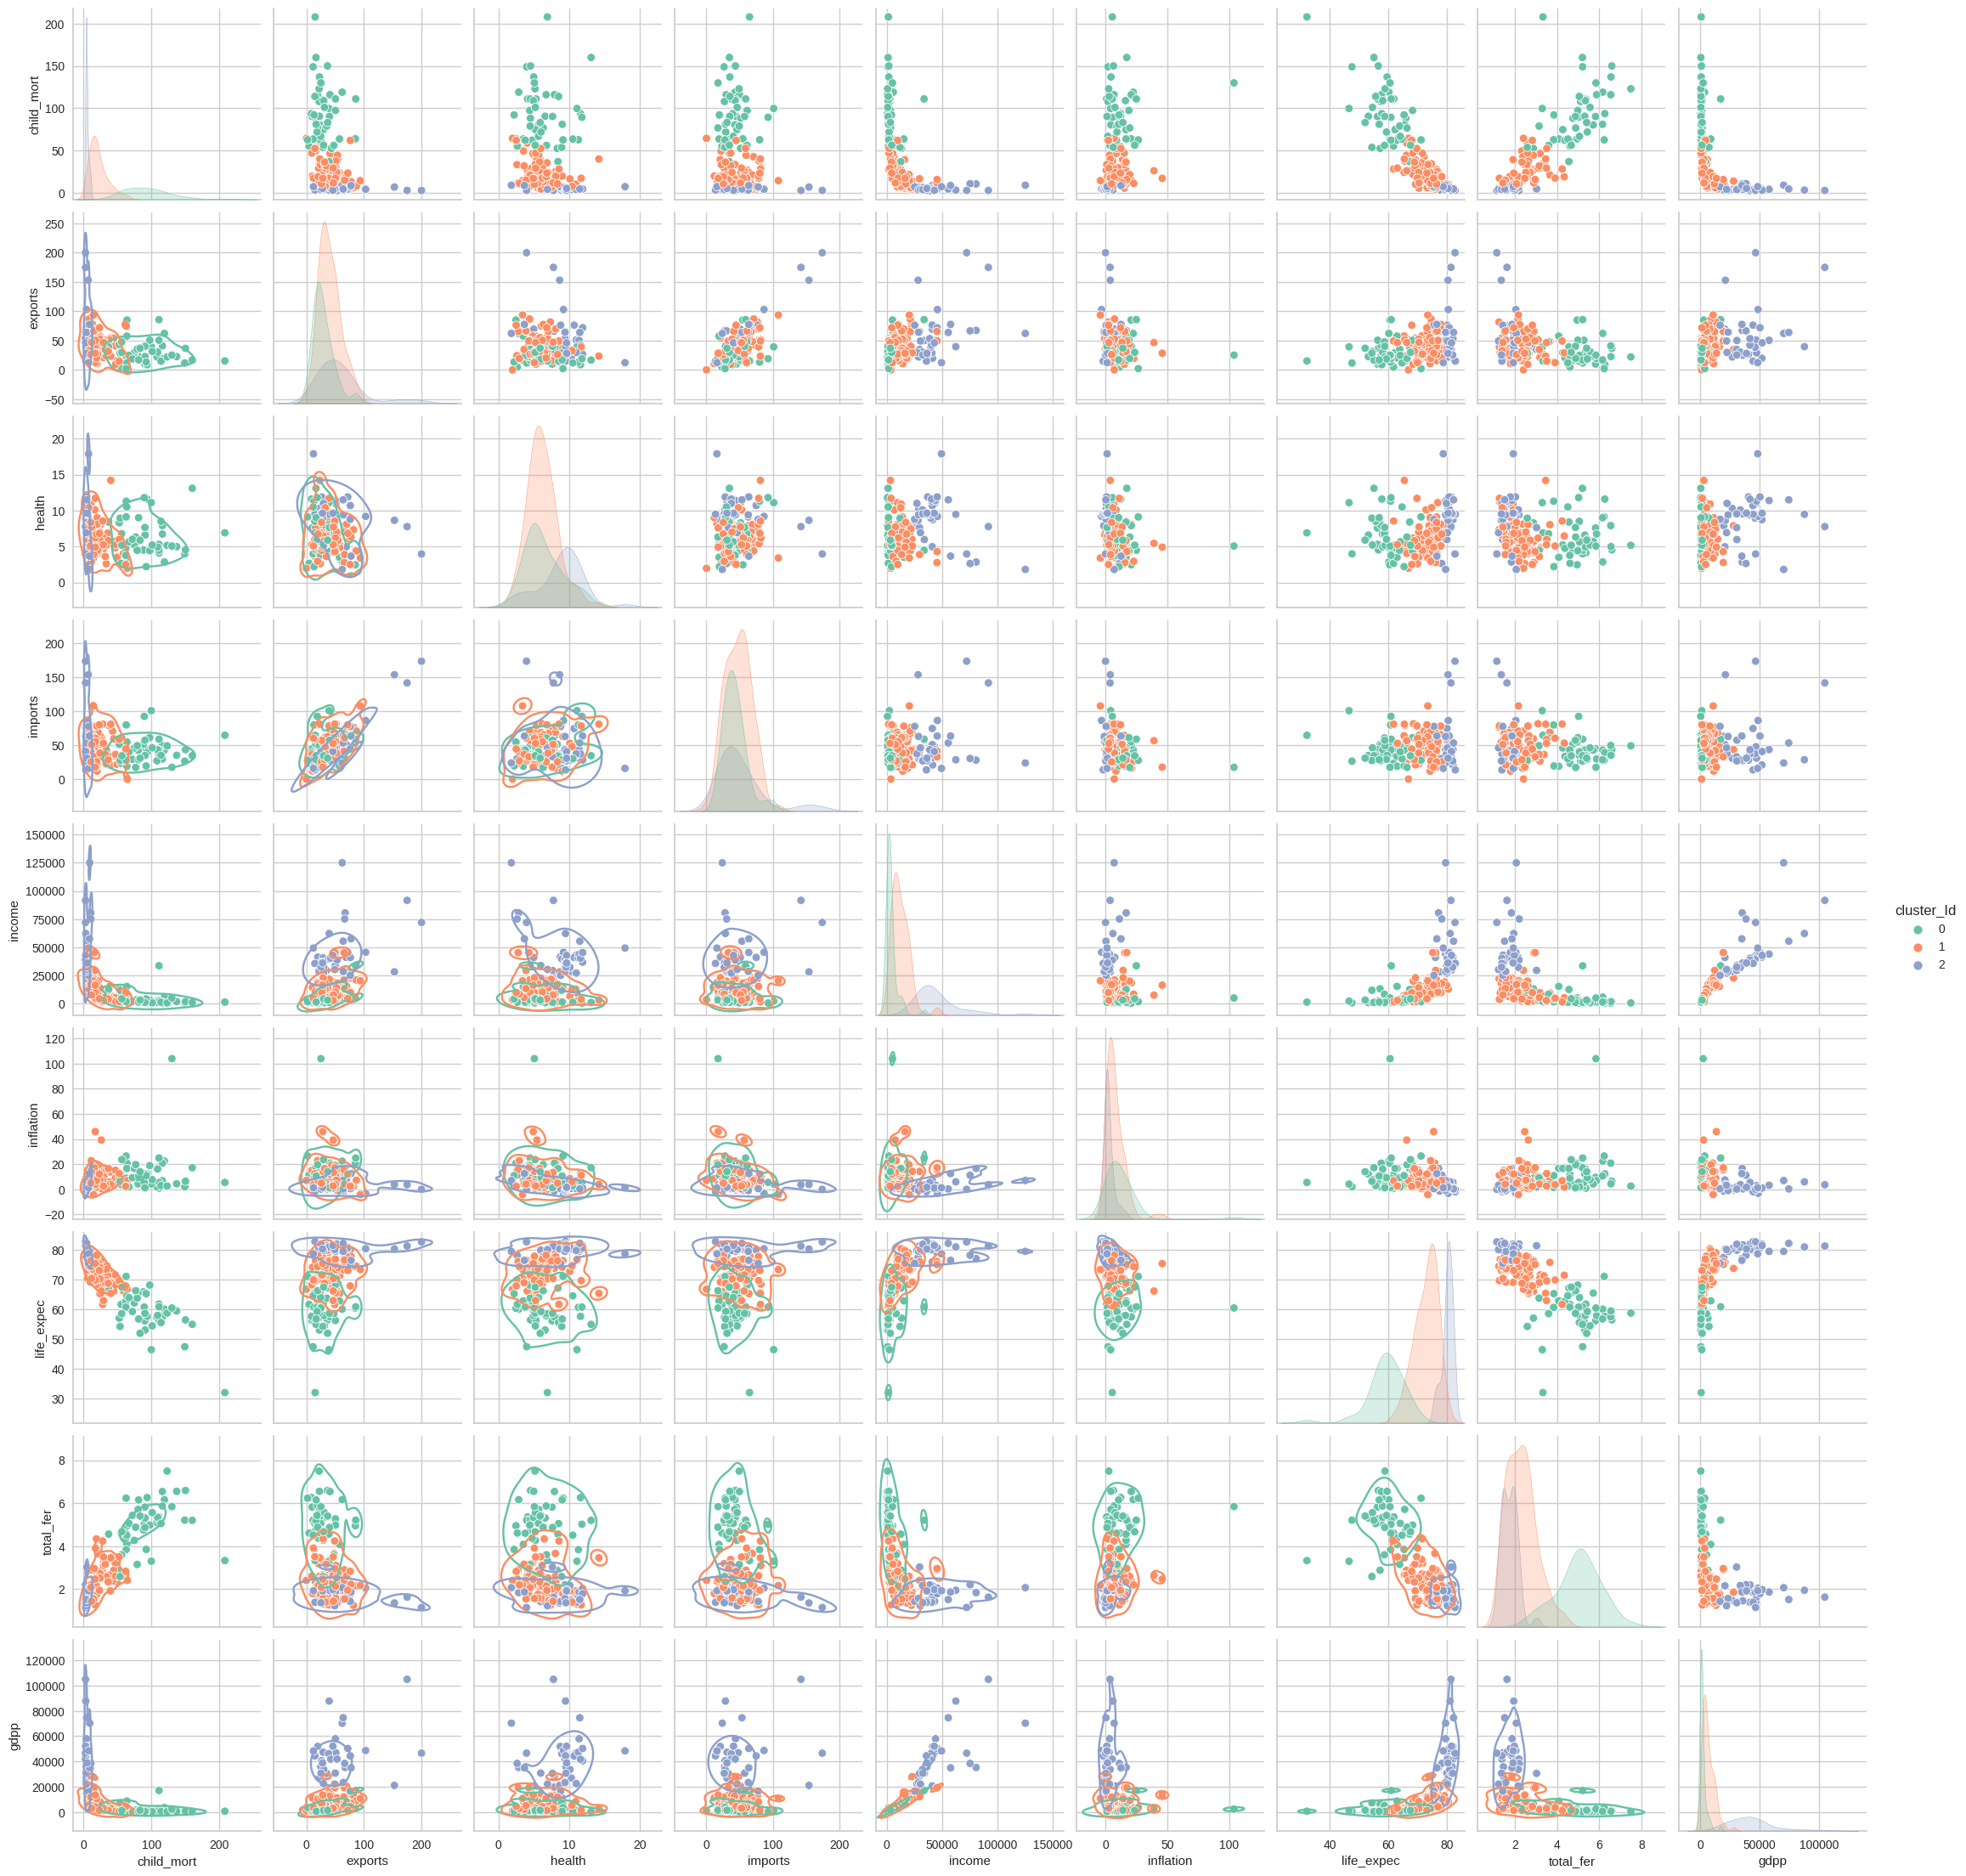

In [143]:
g = sns.pairplot(df, hue='cluster_Id', diag_kind='kde', palette = 'Set2')
_ = g.map_lower(sns.kdeplot, levels=1, color=".2")

# Aula 5

In [ ]:
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidean Distance')

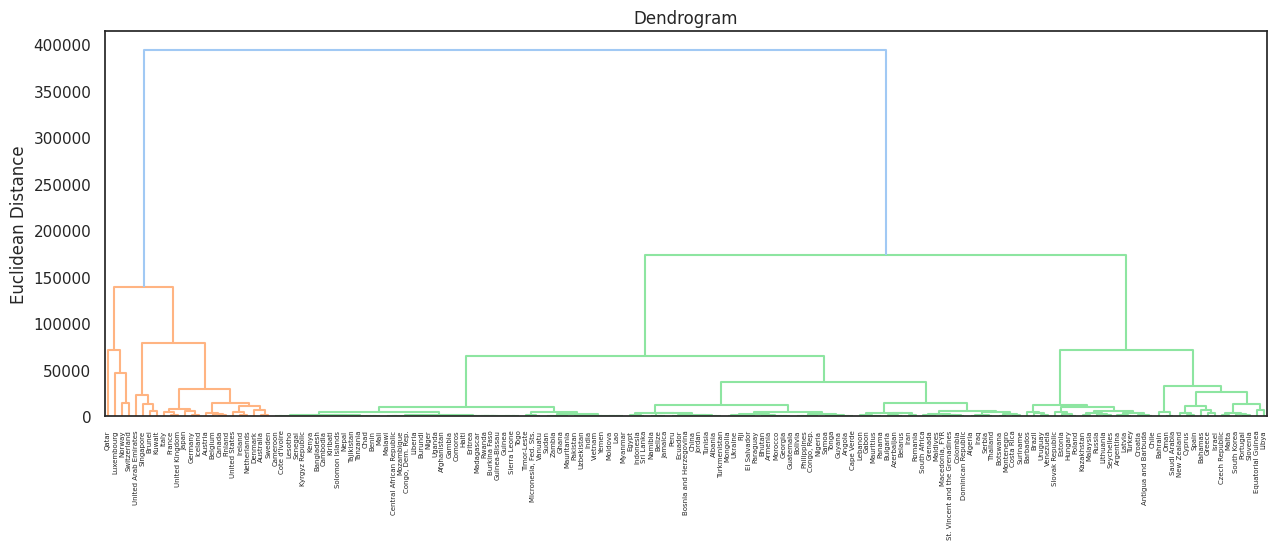

In [ ]:
plt.figure(figsize=(15, 5))
plt.grid(False)
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'), labels=df.index)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')

In [ ]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(20, children.shape[0]+20)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    sch.dendrogram(linkage_matrix, **kwargs)

Text(0, 0.5, 'Euclidean Distance')

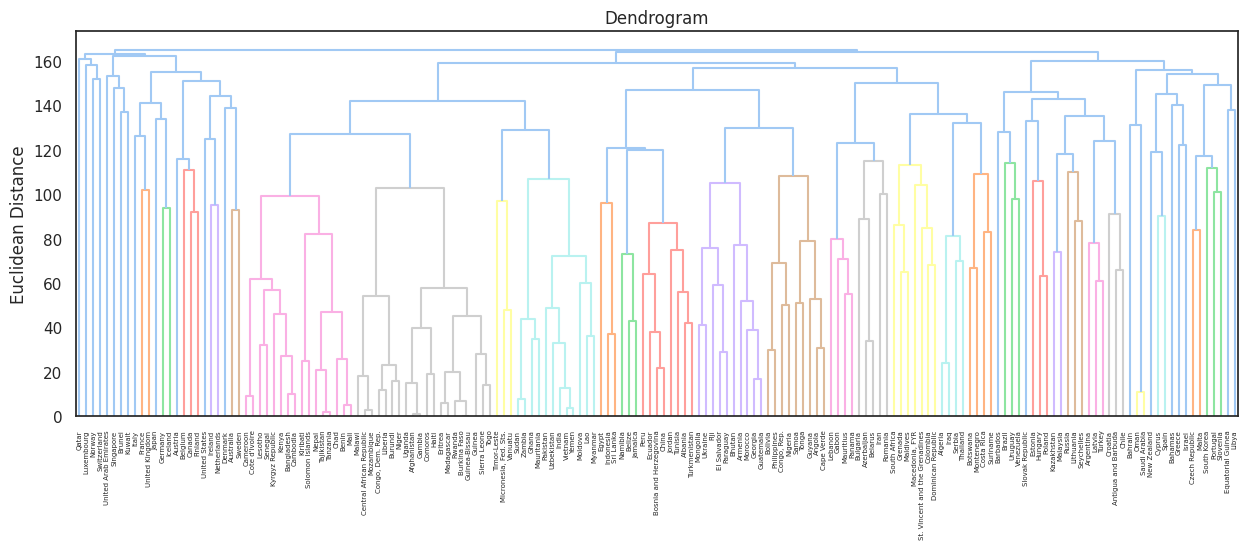

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity = "euclidean",
                             linkage = 'ward')
hc_pred = hc.fit_predict(df)

plt.figure(figsize=(15, 5))
plt.grid(False)
plot_dendrogram(hc, labels=df.index)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')

# Aula 6

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_dendrogram_2(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    sch.dendrogram(linkage_matrix, **kwargs)

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_df.groupby('species').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


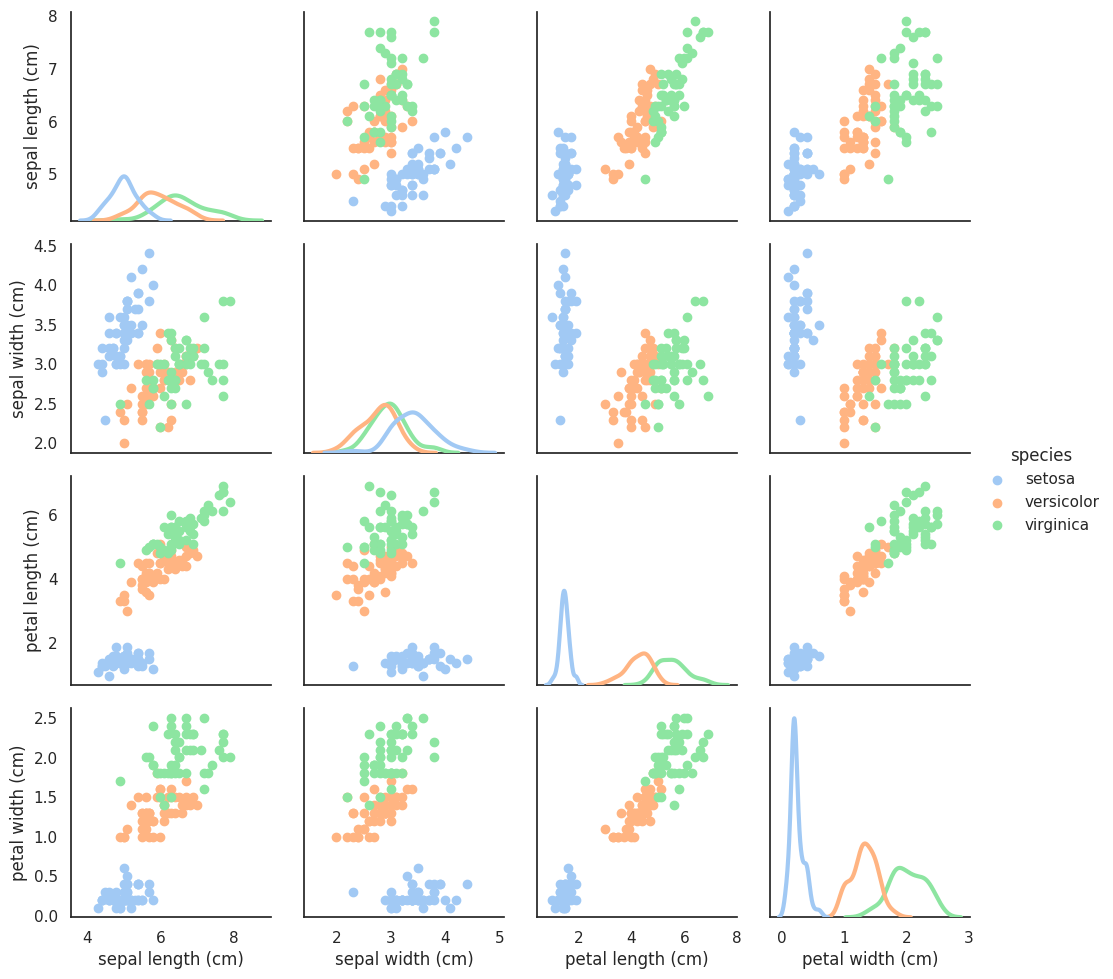

In [ ]:
g = sns.PairGrid(iris_df, vars=iris.feature_names, hue='species')
g.map_diag(sns.kdeplot, lw=3)
g.map_offdiag(plt.scatter)
#g.map(plt.scatter) todas as celulas serao scatter.
g.add_legend()

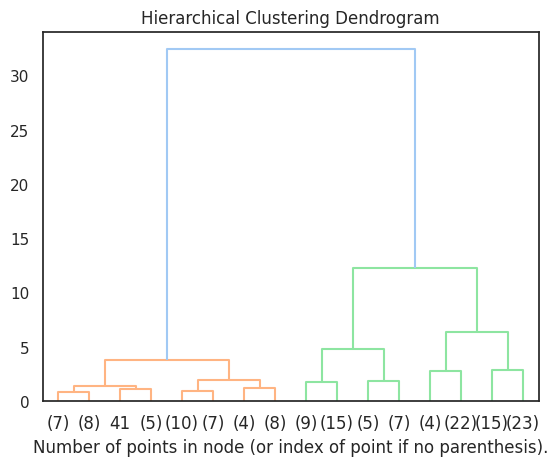

In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(iris.data)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram_2(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
X = (iris.data - iris.data.mean(axis=0)) / iris.data.std(axis=0)

In [ ]:
agg_model = AgglomerativeClustering(n_clusters=3)
agg_model.fit(X)

iris_df['hier_cluster'] = agg_model.labels_

In [ ]:
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X)

iris_df['kmeans_cluster'] = kmeans_model.labels_

In [ ]:
confusion_matrix(iris.target, iris_df['kmeans_cluster'])

array([[ 0, 50,  0],
       [11,  0, 39],
       [36,  0, 14]])

In [ ]:
confusion_matrix(iris.target, iris_df['hier_cluster'])

array([[ 0, 49,  1],
       [23,  0, 27],
       [48,  0,  2]])

In [ ]:
iris_df.groupby('species').mean().drop(['hier_cluster', 'kmeans_cluster'], axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [ ]:
iris_df.groupby('kmeans_cluster').mean().drop(['hier_cluster'], axis=1)

/tmp/ipykernel_25752/3840263511.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  iris_df.groupby('kmeans_cluster').mean().drop(['hier_cluster'], axis=1)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
kmeans_cluster,,,,
0,6.780851,3.095745,5.510638,1.972340
1,5.006000,3.428000,1.462000,0.246000
2,5.801887,2.673585,4.369811,1.413208


In [ ]:
iris_df[iris_df['hier_cluster'] != iris_df['kmeans_cluster']]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,hier_cluster,kmeans_cluster
41,4.5,2.3,1.3,0.3,setosa,2,1
54,6.5,2.8,4.6,1.5,versicolor,0,2
58,6.6,2.9,4.6,1.3,versicolor,0,2
61,5.9,3.0,4.2,1.5,versicolor,0,2
63,6.1,2.9,4.7,1.4,versicolor,0,2
71,6.1,2.8,4.0,1.3,versicolor,0,2
72,6.3,2.5,4.9,1.5,versicolor,0,2
73,6.1,2.8,4.7,1.2,versicolor,0,2
74,6.4,2.9,4.3,1.3,versicolor,0,2
78,6.0,2.9,4.5,1.5,versicolor,0,2


NameError: name 'plot_cluster_points' is not defined

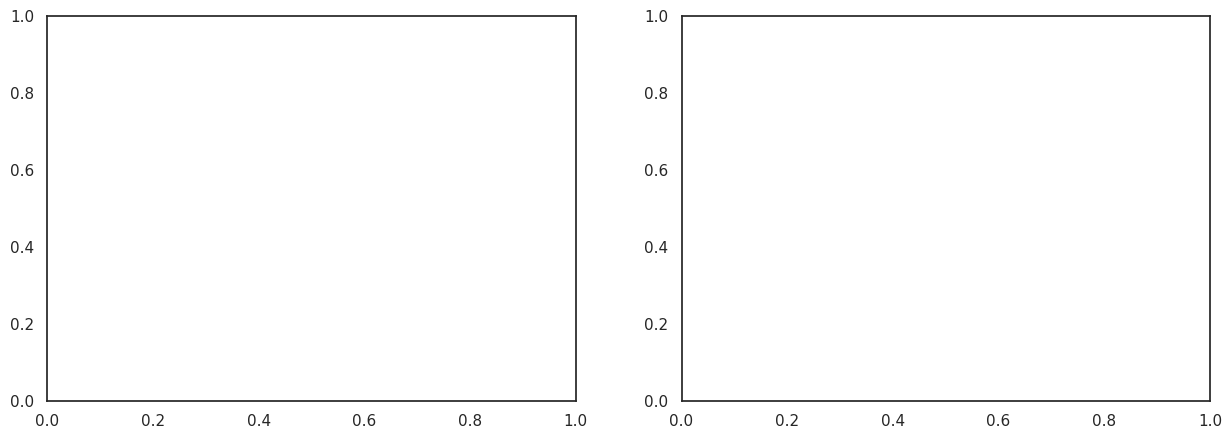

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plot_cluster_points(iris_df[iris.feature_names], iris.target, ax=axs[0])
axs[0].set_title('Cores segundo anotação')
plot_cluster_points(iris_df[iris.feature_names], kmeans_model.labels_, ax=axs[1])
axs[1].set_title('Cores segundo KMeans')

# Aula 7